# Monty Hall Problem

### Description
>The Monty Hall problem is a brain teaser, in the form of a probability puzzle, loosely based on the American television game show Let's Make a Deal and named after its original host, Monty Hall. The problem was originally posed (and solved) in a letter by Steve Selvin to the American Statistician in 1975 (Selvin 1975a), (Selvin 1975b). It became famous as a question from a reader's letter quoted in Marilyn vos Savant's "Ask Marilyn" column in Parade magazine in 1990 (vos Savant 1990a):

>Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

>Vos Savant's response was that the contestant should switch to the other door (vos Savant 1990a). Under the standard assumptions, contestants who switch have a 2/3 chance of winning the car, while contestants who stick to their initial choice have only a 1/3 chance.

![](Images/Monty Hall.jpg)


### The Simple Solution

The solution presented by vos Savant (1990b) in Parade shows the three possible arrangements of one car and two goats behind three doors and the result of staying or switching after initially picking door 1 in each case:


| Behind Door #1 | Behind Door #2 | Behind Door #3 | Result if staying at door #1 | Result if switching to the door offered |
|----------------|----------------|----------------|------------------------------|-----------------------------------------|
| **Car**        | Goat           | Goat           | **Wins Car**                 | Wins Goat                               |
| Goat           | **Car**        | Goat           | Wins Goat                    | **Wins Car**                            |
| Goat           | Goat           | **Car**        | Wins Goat                    | **Wins Car**                            |


<br>

#### Hypothesis: We expect a 66.67% chance of winning if we switch, and 33.33% if we stay
<br>


In [1]:
import random
import numpy as np

In [2]:
doors = ["goat", "goat", "car"]
switch_wins = 0
switch_losses = 0
iterations = 1000000

for trials in range(1,iterations):
    random.shuffle(doors)
    door_picked = random.randint(0,2)
    door_car = [i for i, x in enumerate(doors) if x == "car"]
    goats = [i for i, x in enumerate(doors) if x == "goat"]
    if door_picked in goats:
        goats.remove(door_picked)
    goat_door = random.choice(goats)
    door_to_switch = [0,1,2]
    door_to_switch.remove(goat_door)
    door_to_switch.remove(door_picked)
    if (door_to_switch == door_car):
        switch_wins += 1
    else:
        switch_losses += 1

switch_win_percent = switch_wins/iterations*100
stay_win_percent = switch_losses/iterations*100
        
print("Changing doors has {} wins and {} losses out of {} trials" .format(switch_wins, switch_losses, iterations))
print("Chances of winning if you switch: %6.2f " % switch_win_percent, "%")
print("Chances of winning if you stay: %6.2f " % stay_win_percent, "%")

Changing doors has 666736 wins and 333263 losses out of 1000000 trials
Chances of winning if you switch:  66.67  %
Chances of winning if you stay:  33.33  %


#### After running a million simulations, we can conclude that switching doors is always a better choice

<br>
<br>

# The Birthday Problem

### Description
> The birthday problem or birthday paradox concerns the probability that, in a set of n randomly chosen people, some pair of them will have the same birthday. By the pigeonhole principle, the probability reaches 100% when the number of people reaches 367 (since there are only 366 possible birthdays, including February 29). However, 99.9% probability is reached with just 70 people, and 50% probability with 23 people. These conclusions are based on the assumption that each day of the year (excluding February 29) is equally probable for a birthday.

#### My approach
Rather than calculating the probability of two probability of having the same birthday, I calculated probability that no two people have the same birthday.
<br>
* P(X): Probability of at least two people having the same birthday,
* P(X') = 1 - P(X): Probability that no two people have the same birthday

#### Birthday Probability
If there are only two people in the room, then P(X') = (365/365) x (364/365)

In [98]:
from math import factorial
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style
%matplotlib inline

people = range(1,366)
probabilities = []

for n in people:
    no_birthday_probability = (factorial(365)/((365**n)*factorial(365-n)))*100
    birthday_probability = 100-no_birthday_probability
    probabilities.append(birthday_probability)
    
probability_df = pd.DataFrame(probabilities, columns=['Probability of Matching Birthdays'])
probability_df['Probability of No Matching Birthdays'] = 100-probability_df['Probability of Matching Birthdays']
probability_df['Number of People'] = range(1,366)
probability_df.head()

,Probability of Matching Birthdays,Probability of No Matching Birthdays,Number of People
0,0.000000,100.000000,1
1,0.273973,99.726027,2
2,0.820417,99.179583,3
3,1.635591,98.364409,4
4,2.713557,97.286443,5


plt.figure(figsize=(15, 10))
plt.plot(probability_df['Number of People'], probability_df['Probability of Matching Birthdays'])
plt.plot(probability_df['Number of People'], probability_df['Probability of No Matching Birthdays'], color='black')
plt.xlabel("Number of People")
plt.ylabel("Chance of at least one matching birthday")
plt.plot([23], [50], marker='o', markersize=5, color="red")
plt.show()

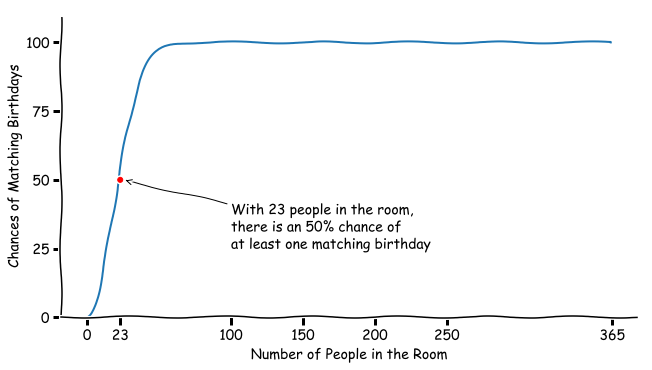

In [127]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure(figsize=(10,6))
    #plt.figure(figsize=(15, 10))
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([0,23,100,150,200,250, 365])
    plt.yticks([0, 25, 50, 75, 100])
    ax.set_ylim([0, 110])

   
    plt.annotate(
        'With 23 people in the room,\nthere is an 50% chance of\nat least one matching birthday',
        xy=(25, 50), arrowprops=dict(arrowstyle='->'), xytext=(100, 25))

    plt.plot(probability_df['Probability of Matching Birthdays'])
    plt.plot([23], [50], marker='o', markersize=5, color="red")

    plt.xlabel('Number of People in the Room')
    plt.ylabel('Chances of Matching Birthdays')

> Next Steps

### Let's take it a step further
What is the probability of at least one shared birthday between at least one man and one woman?

![](Images/Birthday Problem Generalization.svg)

* m = # of men
* w = # of women
* d = 365
* S2 are the Sterling numbers of the Second Kind


In [2]:
def stirling(n,k):
    n1=n
    k1=k
    if n<=0:
        return 1
     
    elif k<=0:
        return 0
     
    elif (n==0 and k==0):
        return -1
     
    elif n!=0 and n==k:
        return 1
     
    elif n<k:
        return 0
 
    else:
        temp1=stirling(n1-1,k1)
        temp1=k1*temp1
        return (k1*(stirling(n1-1,k1)))+stirling(n1-1,k1-1)